In [1]:
import pandas as pd 

In [2]:
import numpy as np 

In [4]:
import yfinance as yf 

In [5]:

from datetime import datetime

# Function to get the number of bullish and bearish days within a date range
def count_bullish_bearish_days(symbol, start_date, end_date):
    # Download historical data for the given symbol
    data = yf.download(symbol, start=start_date, end=end_date, interval="1d")
    
    # Check if data is available
    if data.empty:
        print("No data available for the specified date range.")
        return None

    # Add a column to determine if the day was bullish or bearish
    data['Trend'] = data['Close'] > data['Open']
    
    # Count bullish and bearish days
    bullish_days = data['Trend'].sum()  # Sum of True values (bullish days)
    bearish_days = len(data) - bullish_days  # Total days minus bullish days

    # Print results
    print(f"Bullish Days: {bullish_days}")
    print(f"Bearish Days: {bearish_days}")

    return bullish_days, bearish_days

# Define symbol and date range
symbol = 'AAPL'  # Replace with the symbol of your choice
start_date = '2023-01-01'
end_date = '2023-12-31'

# Call the function
count_bullish_bearish_days(symbol, start_date, end_date)


[*********************100%%**********************]  1 of 1 completed
Bullish Days: 151
Bearish Days: 99


c:\Users\Shoaib khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


(151, 99)

In [9]:
from datetime import datetime
# Define symbol and date range
symbol = '^DJI'  # Replace with the symbol of your choice
start_date = '2023-01-01'
end_date = '2024-10-31'

# Function to get the number of bullish and bearish days within a date range
def count_bullish_bearish_days(symbol, start_date, end_date):
    # Download historical data for the given symbol
    data = yf.download(symbol, start=start_date, end=end_date, interval="1d")
    
    # Check if data is available
    if data.empty:
        print("No data available for the specified date range.")
        return None

    # Add a column to determine if the day was bullish or bearish
    data['Trend'] = data['Close'] > data['Open']
    
    # Count bullish and bearish days
    bullish_days = data['Trend'].sum()  # Sum of True values (bullish days)
    bearish_days = len(data) - bullish_days  # Total days minus bullish days

    # Print results
    print(f"Bullish Days: {bullish_days}")
    print(f"Bearish Days: {bearish_days}")

    return bullish_days, bearish_days


# Call the function
count_bullish_bearish_days(symbol, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
Bullish Days: 253
Bearish Days: 207


c:\Users\Shoaib khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


(253, 207)

In [22]:


# Function to get bullish and bearish day counts overall and by weekday for a specified symbol and date range
def count_bullish_bearish_days(symbol, start_date, end_date):
    """
    Counts the number of bullish and bearish days within a specified date range
    for a given financial product (symbol) and also counts by weekday.

    Parameters:
    - symbol (str): The ticker symbol of the financial product (e.g., 'AAPL' for Apple, 'SPY' for S&P 500).
    - start_date (str): The start date of the period in 'YYYY-MM-DD' format.
    - end_date (str): The end date of the period in 'YYYY-MM-DD' format.

    Returns:
    - A tuple containing the overall bullish and bearish day counts and a DataFrame 
      with weekday-based bullish and bearish day counts.
    """

    # Download historical data for the given symbol and date range
    data = yf.download(symbol, start=start_date, end=end_date, interval="1d")
    
    # Check if data is available
    if data.empty:
        print("No data available for the specified date range or symbol.")
        return None

    # Add weekday and trend columns
    data['Weekday'] = data.index.day_name()  # Get weekday names
    data['Trend'] = data['Close'] > data['Open']  # True for bullish, False for bearish

    # Overall bullish and bearish days
    bullish_days = data['Trend'].sum()  # Sum of True values (bullish days)
    bearish_days = len(data) - bullish_days  # Total days minus bullish days

    # Bullish and bearish days by weekday
    weekday_summary = data.groupby('Weekday')['Trend'].agg(['sum', 'count'])
    weekday_summary.columns = ['Bullish Days', 'Total Days']
    weekday_summary['Bearish Days'] = weekday_summary['Total Days'] - weekday_summary['Bullish Days']

    # Print overall result
    print(f"Symbol: {symbol}")
    print(f"Date Range: {start_date} to {end_date}")
    print(f"\nOverall Bullish Days: {bullish_days}")
    print(f"Overall Bearish Days: {bearish_days}\n")

    # Print summary by weekday
    print("Bullish and Bearish Days by Weekday:")
    print(weekday_summary.sort_index())  # Sorted by weekday

    return bullish_days, bearish_days, weekday_summary

# Example usage:
# Change 'AAPL' to any other symbol and adjust date range as needed
symbol = '^DJI'        # Example: 'AAPL' for Apple stock, 'SPY' for S&P 500 ETF
start_date = '2008-01-01'
end_date = '2024-10-31'

# Call the function
overall_bullish_days, overall_bearish_days, weekday_summary = count_bullish_bearish_days(symbol, start_date, end_date)


[*********************100%%**********************]  1 of 1 completed
Symbol: ^DJI
Date Range: 2008-01-01 to 2024-10-31

Overall Bullish Days: 2275
Overall Bearish Days: 1962

Bullish and Bearish Days by Weekday:
           Bullish Days  Total Days  Bearish Days
Weekday                                          
Friday              477         848           371
Monday              415         792           377
Thursday            479         855           376
Tuesday             446         871           425
Wednesday           458         871           413


c:\Users\Shoaib khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [32]:
def count_bullish_bearish_days(symbol, start_date, end_date):
    """
    Counts the number of bullish and bearish days within a specified date range
    for a given financial product (symbol) and also counts by weekday.

    Parameters:
    - symbol (str): The ticker symbol of the financial product (e.g., 'AAPL' for Apple, 'SPY' for S&P 500).
    - start_date (str): The start date of the period in 'YYYY-MM-DD' format.
    - end_date (str): The end date of the period in 'YYYY-MM-DD' format.

    Returns:
    - A tuple containing the overall bullish and bearish day counts and a DataFrame 
      with weekday-based bullish and bearish day counts.
    """

    # Download historical data for the given symbol and date range
    data = yf.download(symbol, start=start_date, end=end_date, interval="1d")
    
    # Check if data is available
    if data.empty:
        print("No data available for the specified date range or symbol.")
        return None

    # Add weekday and trend columns
    data['Weekday'] = data.index.day_name()  # Get weekday names
    data['Trend'] = data['Close'] > data['Open']  # True for bullish, False for bearish

    # Overall bullish and bearish days
    bullish_days = data['Trend'].sum()  # Sum of True values (bullish days)
    bearish_days = len(data) - bullish_days  # Total days minus bullish days

    # Bullish and bearish days by weekday
    weekday_summary = data.groupby('Weekday')['Trend'].agg(['sum', 'count'])
    weekday_summary.columns = ['Bullish Days', 'Total Days']
    weekday_summary['Bearish Days'] = weekday_summary['Total Days'] - weekday_summary['Bullish Days']

    # Print overall result
    print(f"Symbol: {symbol}")
    print(f"Date Range: {start_date} to {end_date}")
    print(f"\nOverall Bullish Days: {bullish_days}")
    print(f"Overall Bearish Days: {bearish_days}\n")

    # Print summary by weekday
    print("Bullish and Bearish Days by Weekday:")
    print(weekday_summary.sort_index())  # Sorted by weekday

    return bullish_days, bearish_days, weekday_summary

# Example usage:
# 
symbol = 'EURUSD=X'         
start_date = '2023-01-01'
end_date = '2024-10-31'

# Call the function
overall_bullish_days, overall_bearish_days, weekday_summary = count_bullish_bearish_days(symbol, start_date, end_date)


[*********************100%%**********************]  1 of 1 completed
Symbol: EURUSD=X
Date Range: 2023-01-01 to 2024-10-31

Overall Bullish Days: 4
Overall Bearish Days: 474

Bullish and Bearish Days by Weekday:
           Bullish Days  Total Days  Bearish Days
Weekday                                          
Friday                0          95            95
Monday                4          96            92
Thursday              0          95            95
Tuesday               0          96            96
Wednesday             0          96            96


c:\Users\Shoaib khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [42]:
import yfinance as yf

# Function to get proper open and close prices
def count_bullish_bearish_days(symbol, start_date, end_date):
    # Download historical data for the given symbol and date range
    data = yf.download(symbol, start=start_date, end=end_date, interval="1d")

    # Display the data to verify
    print("Sample Data:\n", data[['Open', 'Close']].head(10))

    # Ensure data has distinct 'Open' and 'Close' columns for bullish/bearish day calculation
    if data['Open'].equals(data['Close']):
        print("Warning: 'Open' and 'Close' prices appear identical. Check data source.")
        return None

    # Bullish and Bearish calculation as before
    data.dropna(inplace=True)
    data['Trend'] = data['Close'] > data['Open']  # True for bullish, False for bearish
    data['Weekday'] = data.index.day_name()

    # Calculate totals
    bullish_days = data['Trend'].sum()
    bearish_days = len(data) - bullish_days

    # By weekday summary
    weekday_summary = data.groupby('Weekday')['Trend'].agg(['sum', 'count'])
    weekday_summary.columns = ['Bullish Days', 'Total Days']
    weekday_summary['Bearish Days'] = weekday_summary['Total Days'] - weekday_summary['Bullish Days']

    print(f"\nSymbol: {symbol}")
    print(f"Date Range: {start_date} to {end_date}")
    print(f"Overall Bullish Days: {bullish_days}")
    print(f"Overall Bearish Days: {bearish_days}\n")

    print("Bullish and Bearish Days by Weekday:")
    print(weekday_summary.sort_index())

# Use the function
symbol = '^DJI'
start_date = '2023-10-01'
end_date = '2024-10-31'
count_bullish_bearish_days(symbol, start_date, end_date)


[*********************100%%**********************]  1 of 1 completed

c:\Users\Shoaib khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



Sample Data:
                     Open         Close
Date                                  
2023-10-02  33455.500000  33433.351562
2023-10-03  33318.839844  33002.378906
2023-10-04  33034.179688  33129.550781
2023-10-05  33099.230469  33119.570312
2023-10-06  33040.699219  33407.578125
2023-10-09  33259.839844  33604.648438
2023-10-10  33683.410156  33739.300781
2023-10-11  33822.199219  33804.871094
2023-10-12  33845.648438  33631.140625
2023-10-13  33733.339844  33670.289062

Symbol: ^DJI
Date Range: 2023-10-01 to 2024-10-31
Overall Bullish Days: 154
Overall Bearish Days: 119

Bullish and Bearish Days by Weekday:
           Bullish Days  Total Days  Bearish Days
Weekday                                          
Friday               35          55            20
Monday               30          51            21
Thursday             31          54            23
Tuesday              30          57            27
Wednesday            28          56            28


In [39]:
import yfinance as yf

# Function to download data and calculate candle sizes for bullish/bearish Fridays
def friday_candle_analysis(symbol, start_date, end_date):
    # Download historical data
    data = yf.download(symbol, start=start_date, end=end_date, interval="1d")
    
    # Drop any rows with missing values
    data.dropna(inplace=True)
    
    # Calculate candle size (High - Low) for each day
    data['CandleSize'] = data['High'] - data['Low']
    
    # Identify bullish and bearish days
    data['Trend'] = data['Close'] > data['Open']
    
    # Filter for Fridays only
    friday_data = data[data.index.day_name() == 'Friday']
    
    # Separate bullish and bearish Fridays
    bullish_fridays = friday_data[friday_data['Trend'] == True]
    bearish_fridays = friday_data[friday_data['Trend'] == False]
    
    # Find max and min candle sizes for bullish Fridays
    max_bullish_candle = bullish_fridays['CandleSize'].max()
    min_bullish_candle = bullish_fridays['CandleSize'].min()
    
    # Find max and min candle sizes for bearish Fridays
    max_bearish_candle = bearish_fridays['CandleSize'].max()
    min_bearish_candle = bearish_fridays['CandleSize'].min()
    
    # Display results
    print(f"\nAnalysis for {symbol} from {start_date} to {end_date}")
    print("Bullish Fridays:")
    print(f"Largest Candle Size: {max_bullish_candle}")
    print(f"Smallest Candle Size: {min_bullish_candle}")
    
    print("\nBearish Fridays:")
    print(f"Largest Candle Size: {max_bearish_candle}")
    print(f"Smallest Candle Size: {min_bearish_candle}")

# Example usage
symbol = '^DJI'
start_date = '2020-01-01'
end_date = '2024-10-31'
friday_candle_analysis(symbol, start_date, end_date)


[*********************100%%**********************]  1 of 1 completed

Analysis for ^DJI from 2020-01-01 to 2024-10-31
Bullish Fridays:
Largest Candle Size: 1904.390625
Smallest Candle Size: 83.708984375

Bearish Fridays:
Largest Candle Size: 1436.990234375
Smallest Candle Size: 111.01953125


c:\Users\Shoaib khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [41]:
import yfinance as yf

# Function to download data, calculate candle sizes, and identify dates of extreme candle sizes on Fridays
def friday_candle_analysis(symbol, start_date, end_date, largest_bullish_candle_size):
    # Download historical data
    data = yf.download(symbol, start=start_date, end=end_date, interval="1d")
    
    # Drop any rows with missing values
    data.dropna(inplace=True)
    
    # Calculate candle size (High - Low) for each day
    data['CandleSize'] = data['High'] - data['Low']
    
    # Identify bullish and bearish days
    data['Trend'] = data['Close'] > data['Open']
    
    # Filter for Fridays only
    friday_data = data[data.index.day_name() == 'Friday']
    
    # Separate bullish Fridays
    bullish_fridays = friday_data[friday_data['Trend'] == True]
    
    # Find the date(s) when the largest bullish candle occurred
    largest_bullish_day = bullish_fridays[bullish_fridays['CandleSize'] == largest_bullish_candle_size]
    
    # Display the date(s) and the details of the largest bullish candle
    return largest_bullish_day[['CandleSize']]

# Define parameters
symbol = '^DJI'  # Dow Jones Industrial Average
start_date = '2020-01-01'
end_date = '2024-10-31'
largest_bullish_candle_size = 1904.390625  # Example candle size

# Call the function to get the date(s) of the largest bullish Friday candle
largest_bullish_day = friday_candle_analysis(symbol, start_date, end_date, largest_bullish_candle_size)

# Display the result
print("Date(s) with Largest Bullish Candle Size of", largest_bullish_candle_size)
print(largest_bullish_day)


[*********************100%%**********************]  1 of 1 completed
Date(s) with Largest Bullish Candle Size of 1904.390625
             CandleSize
Date                   
2020-03-13  1904.390625


c:\Users\Shoaib khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [63]:
import yfinance as yf
import pandas as pd

# Fetch historical data for GBP/JPY
ticker = "EURUSD=X"
data = yf.download(ticker, start="2016-01-01", end="2024-10-31", interval="1d")

# Filter only weekdays
data = data[data.index.dayofweek < 5]

# Add a 'Day' column for the day of the week
data['Day'] = data.index.day_name()

# Add a 'Candle' column: 1 for bullish (Close > Open), -1 for bearish (Close < Open)
data['Candle'] = (data['Close'] > data['Open']).astype(int).replace(0, -1)

# Initialize counters
same_candle_count = 0
total_mondays = 0

# Iterate through the data to compare Monday and Tuesday candles
for i in range(len(data) - 1):
    if data.iloc[i]['Day'] == "Monday" and data.iloc[i + 1]['Day'] == "Tuesday":
        total_mondays += 1
        if data.iloc[i]['Candle'] == data.iloc[i + 1]['Candle']:
            same_candle_count += 1

# Calculate percentage
if total_mondays > 0:
    percentage_same = (same_candle_count / total_mondays) * 100
else:
    percentage_same = 0

# Print the results
print(f"Total Mondays: {total_mondays}")
print(f"Same candle on Tuesday: {same_candle_count}")
print(f"Percentage of same candles: {percentage_same:.2f}%")


c:\Users\Shoaib khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*********************100%%**********************]  1 of 1 completed
Total Mondays: 460
Same candle on Tuesday: 297
Percentage of same candles: 64.57%


In [1]:
print(5+5)

10


In [64]:
import yfinance as yf
import pandas as pd

# Fetch historical data for GBP/JPY
ticker = "GBPJPY=X"
data = yf.download(ticker, start="2020-01-01", end="2024-10-31", interval="1d")

# Filter only weekdays
data = data[data.index.dayofweek < 5]

# Add a 'Day' column for the day of the week
data['Day'] = data.index.day_name()

# Add a 'Candle' column: 1 for bullish (Close > Open), -1 for bearish (Close < Open)
data['Candle'] = (data['Close'] > data['Open']).astype(int).replace(0, -1)

# Initialize counters
same_candle_count = 0
total_mondays = 0

# Iterate through the data to compare Monday and Tuesday candles
for i in range(len(data) - 1):
    if data.iloc[i]['Day'] == "Tuesday" and data.iloc[i + 1]['Day'] == "Wednesday":
        total_mondays += 1
        if data.iloc[i]['Candle'] == data.iloc[i + 1]['Candle']:
            same_candle_count += 1

# Calculate percentage
if total_mondays > 0:
    percentage_same = (same_candle_count / total_mondays) * 100
else:
    percentage_same = 0

# Print the results
print(f"Total Tuesday: {total_mondays}")
print(f"Same candle on wednesday: {same_candle_count}")
print(f"Percentage of same candles: {percentage_same:.2f}%")


[*********************100%%**********************]  1 of 1 completed

c:\Users\Shoaib khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



Total Tuesday: 252
Same candle on wednesday: 193
Percentage of same candles: 76.59%


In [48]:
import yfinance as yf
import pandas as pd

# Fetch historical data for GBP/JPY
ticker = "CHFJPY=X"
data = yf.download(ticker, start="2020-01-01", end="2024-10-31", interval="1d")

# Filter only weekdays
data = data[data.index.dayofweek < 5]

# Add a 'Day' column for the day of the week
data['Day'] = data.index.day_name()

# Add a 'Candle' column: 1 for bullish (Close > Open), -1 for bearish (Close < Open)
data['Candle'] = (data['Close'] > data['Open']).astype(int).replace(0, -1)

# Initialize counters
same_candle_count = 0
total_wednesday = 0

# Iterate through the data to compare Monday and Tuesday candles
for i in range(len(data) - 1):
    if data.iloc[i]['Day'] == "Wednesday" and data.iloc[i + 1]['Day'] == "Thursday":
        total_wednesday += 1
        if data.iloc[i]['Candle'] == data.iloc[i + 1]['Candle']:
            same_candle_count += 1

# Calculate percentage
if total_wednesday > 0:
    percentage_same = (same_candle_count / total_wednesday) * 100
else:
    percentage_same = 0

# Print the results
print(f"Total Wednesday: {total_wednesday}")
print(f"Same candle on Thursday: {same_candle_count}")
print(f"Percentage of same candles: {percentage_same:.2f}%")


[*********************100%%**********************]  1 of 1 completed

c:\Users\Shoaib khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



Total Wednesday: 252
Same candle on Thursday: 197
Percentage of same candles: 78.17%


In [92]:
import yfinance as yf
import pandas as pd

# Download historical data from Yahoo Finance for GBP/JPY from 2020-01-01 to 2024-10-31
ticker = "GBPJPY=X"
data = yf.download(ticker, start="2020-01-01", end="2024-10-31", interval="1d")

# Filter only weekdays (exclude weekends)
data = data[data.index.dayofweek < 5]

# Add a 'Day' column for the day of the week
data['Day'] = data.index.day_name()

# Add a 'Candle' column: 1 for bullish (Close > Open), -1 for bearish (Close < Open)
data['Candle'] = (data['Close'] > data['Open']).astype(int).replace(0, -1)

# Save the data to a CSV file
data.to_csv("GBPJPY_data.csv")

# Filter for Thursdays
thursday_data = data[data['Day'] == "Thursday"]

# Initialize counters for matching candles on Thursday and Friday
total_thursday = 0
same_candle_count = 0

# Iterate through Thursdays and check corresponding Friday candles
for index, row in thursday_data.iterrows():
    try:
        # Get the Friday after the current Thursday
        friday_row = data.loc[index + pd.Timedelta(days=1)]
        
        if friday_row['Day'] == "Friday":
            total_thursday += 1
            print(f"Thursday: {row.name}, Candle: {row['Candle']} | "
                  f"Friday: {friday_row.name}, Candle: {friday_row['Candle']}")
            
            # Check if the Thursday and Friday candles match
            if row['Candle'] == friday_row['Candle']:
                same_candle_count += 1
    except KeyError:
        # Skip if no Friday data is available
        continue

# Calculate percentage of matching candles
if total_thursday > 0:
    percentage_same = (same_candle_count / total_thursday) * 100
else:
    percentage_same = 0

# Print the results
print(f"\nTotal Thursdays: {total_thursday}")
print(f"Matching candles on Fridays: {same_candle_count}")
print(f"Percentage of matching candles: {percentage_same:.2f}%")



[*********************100%%**********************]  1 of 1 completed

c:\Users\Shoaib khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



Thursday: 2020-01-02 00:00:00, Candle: 1 | Friday: 2020-01-03 00:00:00, Candle: 1
Thursday: 2020-01-09 00:00:00, Candle: -1 | Friday: 2020-01-10 00:00:00, Candle: 1
Thursday: 2020-01-16 00:00:00, Candle: 1 | Friday: 2020-01-17 00:00:00, Candle: 1
Thursday: 2020-01-23 00:00:00, Candle: -1 | Friday: 2020-01-24 00:00:00, Candle: -1
Thursday: 2020-01-30 00:00:00, Candle: -1 | Friday: 2020-01-31 00:00:00, Candle: -1
Thursday: 2020-02-06 00:00:00, Candle: -1 | Friday: 2020-02-07 00:00:00, Candle: 1
Thursday: 2020-02-13 00:00:00, Candle: -1 | Friday: 2020-02-14 00:00:00, Candle: -1
Thursday: 2020-02-20 00:00:00, Candle: 1 | Friday: 2020-02-21 00:00:00, Candle: -1
Thursday: 2020-02-27 00:00:00, Candle: 1 | Friday: 2020-02-28 00:00:00, Candle: 1
Thursday: 2020-03-05 00:00:00, Candle: 1 | Friday: 2020-03-06 00:00:00, Candle: -1
Thursday: 2020-03-12 00:00:00, Candle: -1 | Friday: 2020-03-13 00:00:00, Candle: -1
Thursday: 2020-03-19 00:00:00, Candle: 1 | Friday: 2020-03-20 00:00:00, Candle: -1
Th

In [93]:
import pandas as pd

# Load the data from the provided file path
file_path = r"D:\python_inter\state1\GBPJPY_data.csv"
data = pd.read_csv(file_path, index_col=0, parse_dates=True)

# Ensure that 'Day' and 'Candle' columns exist in the data
# Add a 'Day' column for the day of the week if it doesn't exist
if 'Day' not in data.columns:
    data['Day'] = data.index.day_name()

# Add a 'Candle' column: 1 for bullish (Close > Open), -1 for bearish (Close < Open)
if 'Candle' not in data.columns:
    data['Candle'] = (data['Close'] > data['Open']).astype(int).replace(0, -1)

# Filter for Thursdays
thursday_data = data[data['Day'] == "Thursday"]

# Initialize counters for matching candles on Thursday and Friday
total_thursday = 0
same_candle_count = 0

# Iterate through Thursdays and check corresponding Friday candles
for index, row in thursday_data.iterrows():
    try:
        # Get the Friday after the current Thursday
        friday_row = data.loc[index + pd.Timedelta(days=1)]
        
        if friday_row['Day'] == "Friday":
            total_thursday += 1
            print(f"Thursday: {row.name}, Candle: {row['Candle']} | "
                  f"Friday: {friday_row.name}, Candle: {friday_row['Candle']}")
            
            # Check if the Thursday and Friday candles match
            if row['Candle'] == friday_row['Candle']:
                same_candle_count += 1
    except KeyError:
        # Skip if no Friday data is available
        continue

# Calculate percentage of matching candles
if total_thursday > 0:
    percentage_same = (same_candle_count / total_thursday) * 100
else:
    percentage_same = 0

# Print the results
print(f"\nTotal Thursdays: {total_thursday}")
print(f"Matching candles on Fridays: {same_candle_count}")
print(f"Percentage of matching candles: {percentage_same:.2f}%")


Thursday: 2020-01-02 00:00:00, Candle: 1 | Friday: 2020-01-03 00:00:00, Candle: 1
Thursday: 2020-01-09 00:00:00, Candle: -1 | Friday: 2020-01-10 00:00:00, Candle: 1
Thursday: 2020-01-16 00:00:00, Candle: 1 | Friday: 2020-01-17 00:00:00, Candle: 1
Thursday: 2020-01-23 00:00:00, Candle: -1 | Friday: 2020-01-24 00:00:00, Candle: -1
Thursday: 2020-01-30 00:00:00, Candle: -1 | Friday: 2020-01-31 00:00:00, Candle: -1
Thursday: 2020-02-06 00:00:00, Candle: -1 | Friday: 2020-02-07 00:00:00, Candle: 1
Thursday: 2020-02-13 00:00:00, Candle: -1 | Friday: 2020-02-14 00:00:00, Candle: -1
Thursday: 2020-02-20 00:00:00, Candle: 1 | Friday: 2020-02-21 00:00:00, Candle: -1
Thursday: 2020-02-27 00:00:00, Candle: 1 | Friday: 2020-02-28 00:00:00, Candle: 1
Thursday: 2020-03-05 00:00:00, Candle: 1 | Friday: 2020-03-06 00:00:00, Candle: -1
Thursday: 2020-03-12 00:00:00, Candle: -1 | Friday: 2020-03-13 00:00:00, Candle: -1
Thursday: 2020-03-19 00:00:00, Candle: 1 | Friday: 2020-03-20 00:00:00, Candle: -1
Thu

In [78]:
import yfinance as yf
import pandas as pd
import numpy as np

# Fetch historical data for GBP/JPY
ticker = "GBPJPY=X"
data = yf.download(ticker, start="2020-01-01", end="2024-10-31", interval="1d")

# Filter only weekdays
data = data[data.index.dayofweek < 5]

# Add a 'Day' column for the day of the week
data['Day'] = data.index.day_name()

# Add a 'Year-Month' column for grouping (e.g., "January 2022")
data['Year-Month'] = data.index.to_period("M").astype(str)

# Add a 'Candle' column: 1 for bullish (Close > Open), -1 for bearish (Close < Open)
data['Candle'] = np.where(data['Close'] > data['Open'], 1, -1)

# Initialize a dictionary to store correlations for each Year-Month
year_month_correlation = {}

# Group by 'Year-Month' and calculate the matching candles for Thursdays and Fridays
for year_month in data['Year-Month'].unique():
    year_month_data = data[data['Year-Month'] == year_month]
    total_thursdays = 0
    matching_candles = 0

    # Compare Thursday's and Friday's candles
    for i in range(len(year_month_data) - 1):
        if (year_month_data.iloc[i]['Day'] == "Thursday" and 
            year_month_data.iloc[i + 1]['Day'] == "Friday"):
            total_thursdays += 1
            if year_month_data.iloc[i]['Candle'] == year_month_data.iloc[i + 1]['Candle']:
                matching_candles += 1
    
    # Calculate correlation percentage
    if total_thursdays > 0:
        year_month_correlation[year_month] = (matching_candles / total_thursdays) * 100
    else:
        year_month_correlation[year_month] = 0

# Convert the results into a DataFrame
year_month_correlation_df = pd.DataFrame(list(year_month_correlation.items()), columns=["Year-Month", "Correlation"])
year_month_correlation_df = year_month_correlation_df.sort_values(by="Year-Month")

# Print the percentages and list
print("Year-Month Correlations:")
print(year_month_correlation_df.to_string(index=False))

# Calculate the average correlation across all Year-Months
average_correlation = year_month_correlation_df['Correlation'].mean()
print(f"\nAverage Correlation Across All Months: {average_correlation:.2f}%")

# Identify the period with the highest correlation
highest_year_month = year_month_correlation_df.iloc[year_month_correlation_df['Correlation'].idxmax()]
print(f"The period with the highest correlation is {highest_year_month['Year-Month']} with {highest_year_month['Correlation']:.2f}% correlation.")


[*********************100%%**********************]  1 of 1 completed

c:\Users\Shoaib khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



Year-Month Correlations:
Year-Month  Correlation
   2020-01         80.0
   2020-02         50.0
   2020-03         50.0
   2020-04         75.0
   2020-05         25.0
   2020-06        100.0
   2020-07         40.0
   2020-08         75.0
   2020-09         25.0
   2020-10         80.0
   2020-11         75.0
   2020-12         25.0
   2021-01         50.0
   2021-02         50.0
   2021-03         50.0
   2021-04         60.0
   2021-05         50.0
   2021-06         25.0
   2021-07         20.0
   2021-08         50.0
   2021-09         50.0
   2021-10          0.0
   2021-11        100.0
   2021-12         40.0
   2022-01         50.0
   2022-02         25.0
   2022-03         50.0
   2022-04        100.0
   2022-05        100.0
   2022-06        100.0
   2022-07        100.0
   2022-08        100.0
   2022-09        100.0
   2022-10        100.0
   2022-11        100.0
   2022-12        100.0
   2023-01        100.0
   2023-02        100.0
   2023-03        100.0
   2023-04    

In [79]:
import yfinance as yf
import pandas as pd
import numpy as np

# Fetch historical data for GBP/JPY
ticker = "GBPJPY=X"
data = yf.download(ticker, start="2018-01-01", end="2024-10-31", interval="1d")

# Filter only weekdays
data = data[data.index.dayofweek < 5]

# Add a 'Day' column for the day of the week
data['Day'] = data.index.day_name()

# Add a 'Month' column
data['Month'] = data.index.month_name()

# Add a 'Year' column
data['Year'] = data.index.year

# Add a 'Candle' column: 1 for bullish (Close > Open), -1 for bearish (Close < Open)
data['Candle'] = np.where(data['Close'] > data['Open'], 1, -1)

# Filter data for December
december_data = data[data['Month'] == "December"]

# Initialize counters
total_thursdays_in_december = 0
matching_candles_in_december = 0

# Iterate through the December data to compare Thursday and Friday candles
for i in range(len(december_data) - 1):
    if (december_data.iloc[i]['Day'] == "Thursday" and 
        december_data.iloc[i + 1]['Day'] == "Friday"):
        total_thursdays_in_december += 1
        if december_data.iloc[i]['Candle'] == december_data.iloc[i + 1]['Candle']:
            matching_candles_in_december += 1

# Calculate percentage
if total_thursdays_in_december > 0:
    percentage_matching_in_december = (matching_candles_in_december / total_thursdays_in_december) * 100
else:
    percentage_matching_in_december = 0

# Print the results
print(f"Total Thursdays in December: {total_thursdays_in_december}")
print(f"Matching candles on Fridays in December: {matching_candles_in_december}")
print(f"Percentage of matching candles in December: {percentage_matching_in_december:.2f}%")


[*********************100%%**********************]  1 of 1 completed
Total Thursdays in December: 26
Matching candles on Fridays in December: 17
Percentage of matching candles in December: 65.38%


c:\Users\Shoaib khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


TESTING

c:\Users\Shoaib khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*********************100%%**********************]  1 of 1 completed


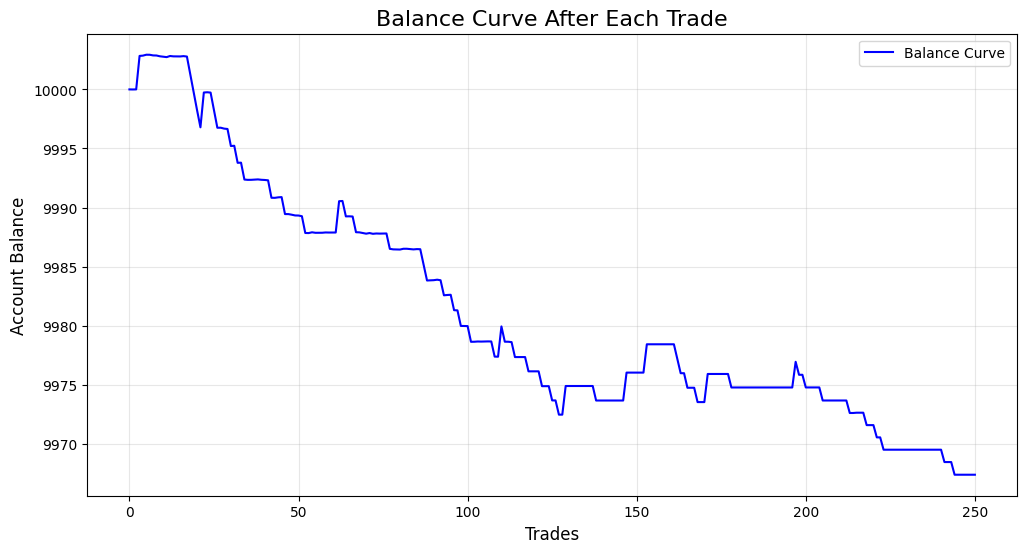

           Day Direction       Entry          SL          TP       Close  \
0   2020-01-21       Buy  143.266998  142.104602  145.591791  143.261993   
1   2020-01-28      Sell  142.244003  143.288101  140.155809  142.238998   
2   2020-02-04       Buy  141.139999  140.486979  142.446041  141.151993   
3   2020-02-11       Buy  141.740204  140.621898  143.976815  141.759995   
4   2020-02-18       Buy  142.800003  142.247600  143.904809  142.830002   
..         ...       ...         ...         ...         ...         ...   
245 2024-10-01      Sell  192.212997  193.499644  189.639704  192.212997   
246 2024-10-08      Sell  193.826996  196.817360  187.846267  193.826996   
247 2024-10-15      Sell  195.552994  197.071857  192.515266  195.552994   
248 2024-10-22      Sell  195.483215  196.500759  193.448128  195.483215   
249 2024-10-29      Sell  198.716003  200.130792  195.886427  198.716003   

          PnL       Balance  
0   -0.006011   9999.993989  
1    0.006740  10000.000729

In [57]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch historical data
ticker = "GBPJPY=X"
data = yf.download(ticker, start="2020-01-01", end="2024-10-31", interval="1d")

# Add Monday/Tuesday indicators
data['Day'] = data.index.day_name()
data['Candle'] = np.where(data['Close'] > data['Open'], 1, -1)  # Bullish (1) or Bearish (-1)

# Calculate ATR for volatility-based SL and TP
atr_period = 14
data['TR'] = np.maximum(data['High'] - data['Low'], 
                        np.maximum(abs(data['High'] - data['Close'].shift(1)), 
                                   abs(data['Low'] - data['Close'].shift(1))))
data['ATR'] = data['TR'].rolling(atr_period).mean()

# Backtest settings
initial_balance = 10000  # Initial capital
risk_per_trade = 0.02    # 2% risk per trade
balance = initial_balance
balances = [balance]  # Track balance over time
results = []

# Backtest logic
for i in range(atr_period, len(data) - 1):  # Skip rows without valid ATR
    if data.iloc[i-1]['Day'] == 'Monday' and data.iloc[i]['Day'] == 'Tuesday':
        atr = data.iloc[i]['ATR']
        monday_candle = data.iloc[i-1]['Candle']
        entry_price = data.iloc[i]['Open']
        
        if monday_candle == 1:  # Bullish Monday
            sl = data.iloc[i-1]['Low'] - (0.5 * atr)
            tp = entry_price + 2 * (entry_price - sl)
            direction = 'Buy'
        elif monday_candle == -1:  # Bearish Monday
            sl = data.iloc[i-1]['High'] + (0.5 * atr)
            tp = entry_price - 2 * (sl - entry_price)
            direction = 'Sell'
        else:
            continue

        # Simulate trade outcome
        if direction == 'Buy':
            if data.iloc[i]['High'] >= tp:  # Take Profit hit
                pnl = tp - entry_price
            elif data.iloc[i]['Low'] <= sl:  # Stop Loss hit
                pnl = sl - entry_price
            else:  # Assume trade closed at Close price
                pnl = data.iloc[i]['Close'] - entry_price
        elif direction == 'Sell':
            if data.iloc[i]['Low'] <= tp:  # Take Profit hit
                pnl = entry_price - tp
            elif data.iloc[i]['High'] >= sl:  # Stop Loss hit
                pnl = entry_price - sl
            else:  # Assume trade closed at Close price
                pnl = entry_price - data.iloc[i]['Close']

        # Update balance based on PnL
        position_size = balance * risk_per_trade / abs(entry_price - sl)
        trade_pnl = pnl * position_size / entry_price
        balance += trade_pnl
        balances.append(balance)

        # Log trade details
        results.append({
            'Day': data.index[i],
            'Direction': direction,
            'Entry': entry_price,
            'SL': sl,
            'TP': tp,
            'Close': data.iloc[i]['Close'],
            'PnL': trade_pnl,
            'Balance': balance
        })

# Results as a DataFrame
trades = pd.DataFrame(results)

# Plot balance curve
plt.figure(figsize=(12, 6))
plt.plot(balances, label='Balance Curve', color='blue')
plt.title("Balance Curve After Each Trade", fontsize=16)
plt.xlabel("Trades", fontsize=12)
plt.ylabel("Account Balance", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# Print trade summary
print(trades)
